In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

file_path = r"C:\Users\RAHUL\Downloads\Customer Churn.csv"

df = pd.read_csv(file_path, encoding="utf-8")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing Blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:

df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
df.duplicated().sum()

0

In [40]:
df["customerID"].duplicated().sum()

0

In [44]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']= df["SeniorCitizen"].apply(conv)

In [50]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<function matplotlib.pyplot.show(close=None, block=None)>

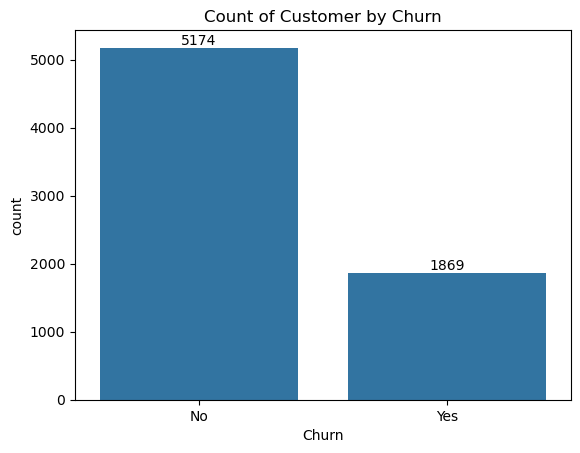

In [86]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show



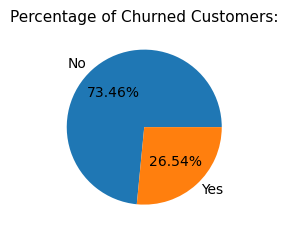

In [84]:
plt.figure(figsize=(2.5,3.5))
csk=df.groupby("Churn").agg({'Churn':'count'})
plt.pie(csk['Churn'],labels=csk.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers:",fontsize =11)
plt.show()

# Exploring the reason behind customer churned out from the above pie_chart which is 26.54%

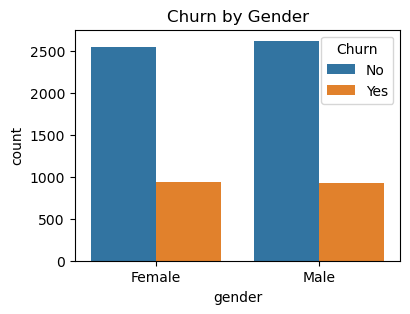

In [109]:
plt.figure(figsize=(4.2,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

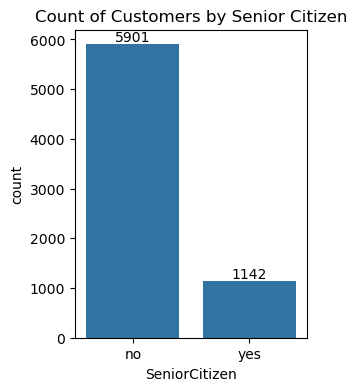

In [133]:
plt.figure(figsize=(3,4))
rcb=sns.countplot(x="SeniorCitizen",data=df)
rcb.bar_label(rcb.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show() 

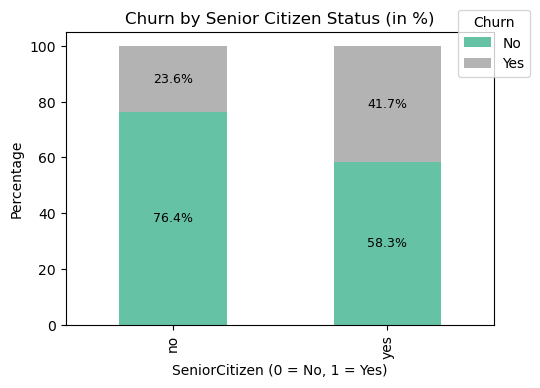

In [155]:

# Step 1: Create a crosstab of counts
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentage
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Plot
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(5.5,4), colormap='Set2')

# Step 4: Add labels
for i, row in enumerate(cross_tab_percent.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, cum_height + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=9)
            cum_height += val

# Step 5: Final touch
plt.title("Churn by Senior Citizen Status (in %)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title='Churn',bbox_to_anchor=(1.1,1.1), loc='upper right')
plt.tight_layout()
plt.show()


# Comparative a greated percentage of people in senior citizen category have churned 

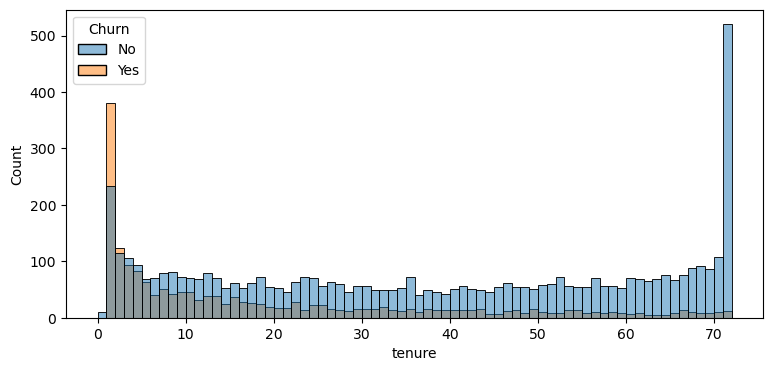

In [160]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72, hue="Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used for #1 or #2 months have churned

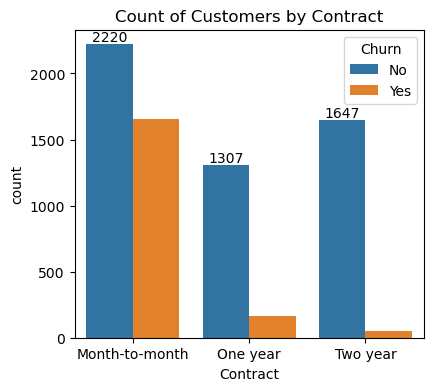

In [167]:
plt.figure(figsize=(4.5,4))
rcb=sns.countplot(x="Contract",data=df,hue="Churn")
rcb.bar_label(rcb.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have month to month contract are likely to churn from those who have 1 or 2 years of contract

In [170]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

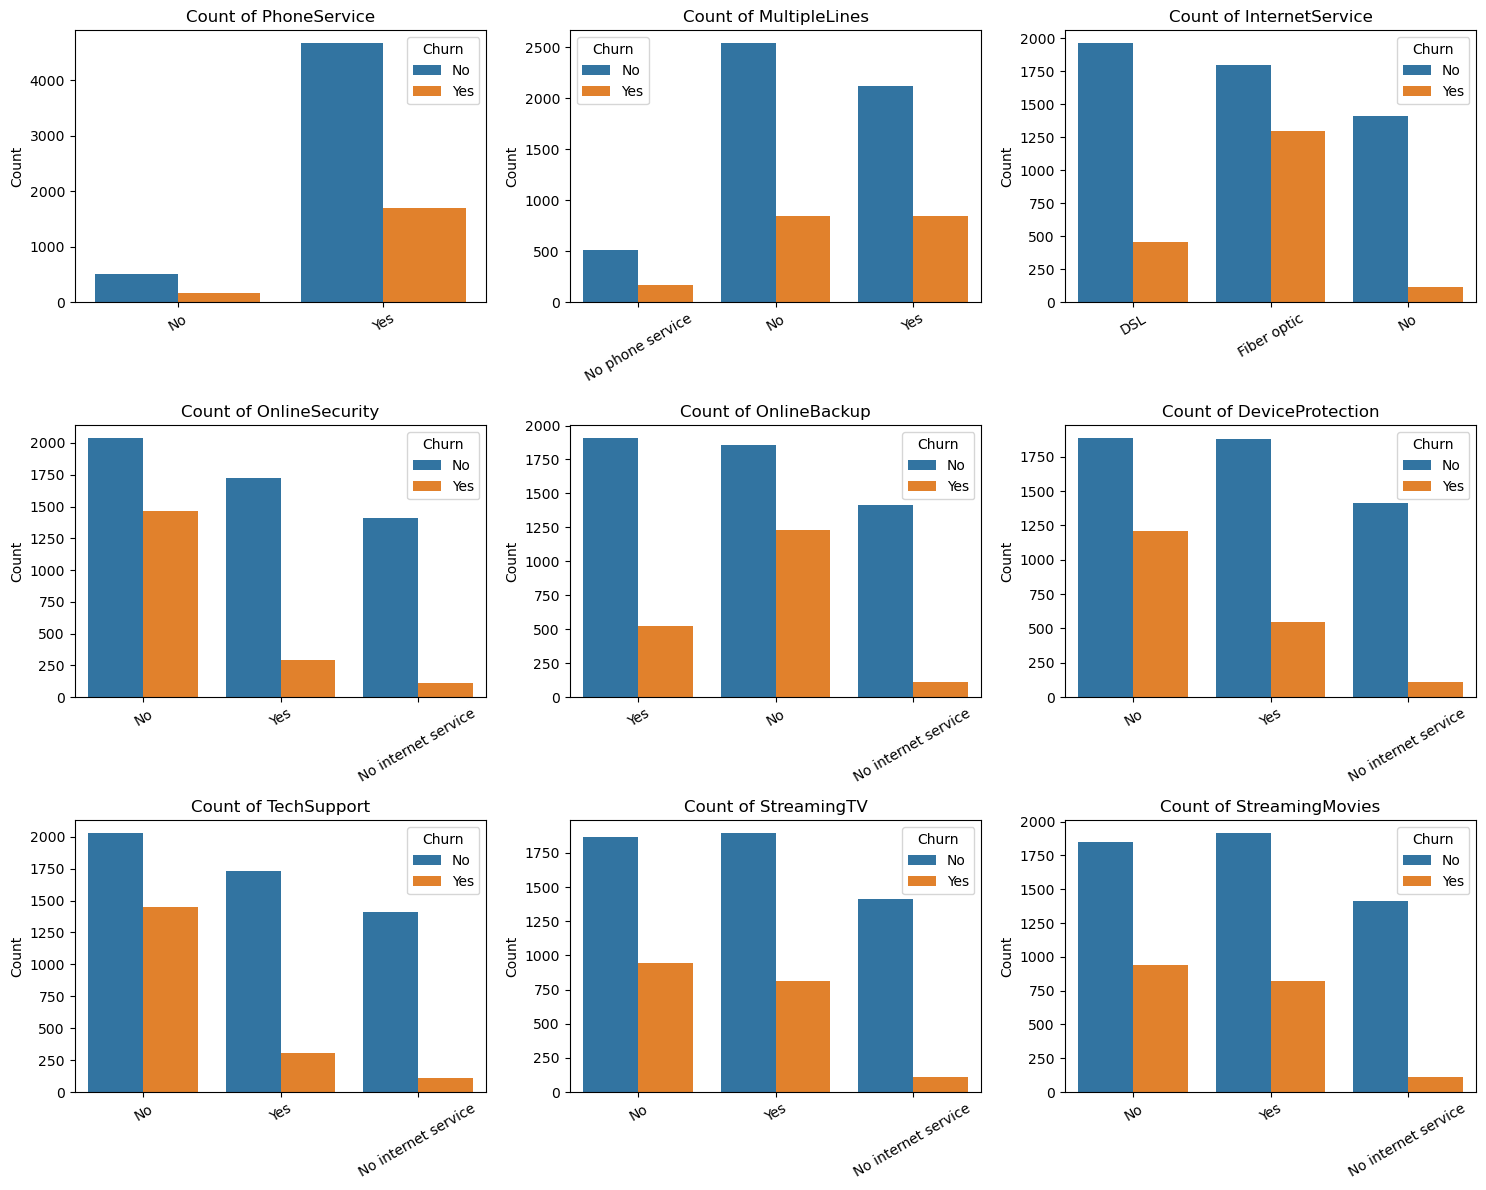

In [178]:

# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division

plt.figure(figsize=(15, n_rows * 4))

# Loop through each column and plot
for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=col, data=df,hue=df["Churn"])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#🔹 Customers without additional services (like OnlineSecurity, TechSupport, DeviceProtection, etc.) tend to have a higher churn rate compared to those with these services.
🔹 Fiber optic users show a significantly higher churn than DSL or no internet service users.
🔹 Features like StreamingTV, OnlineBackup, and MultipleLines also show visible churn, especially when the service is either not subscribed or not available.
🔹 Overall, customers who lack value-added services or have fiber optic internet are more likely to churn.

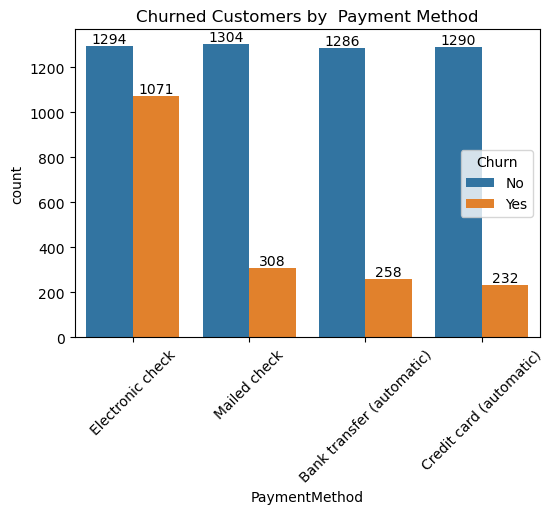

In [181]:
plt.figure(figsize=(6,4))
rcb=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
rcb.bar_label(rcb.containers[0])
rcb.bar_label(rcb.containers[1])
plt.title("Churned Customers by  Payment Method")
plt.xticks(rotation=45)
plt.show()

# Customer is likely to churn when using electronic payment method 

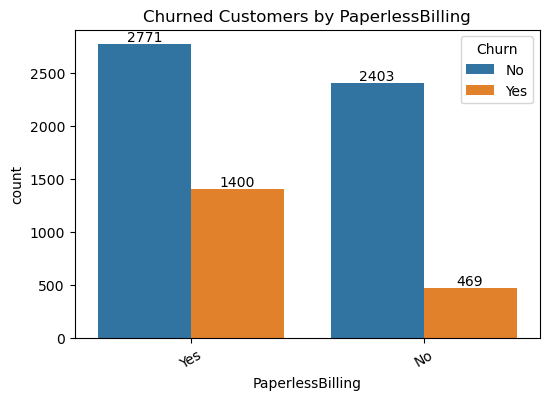

In [13]:
plt.figure(figsize=(6,4))
rcb=sns.countplot(x="PaperlessBilling",data=df,hue="Churn")
rcb.bar_label(rcb.containers[0])
rcb.bar_label(rcb.containers[1])
plt.title("Churned Customers by PaperlessBilling")
plt.xticks(rotation=30)
plt.show()

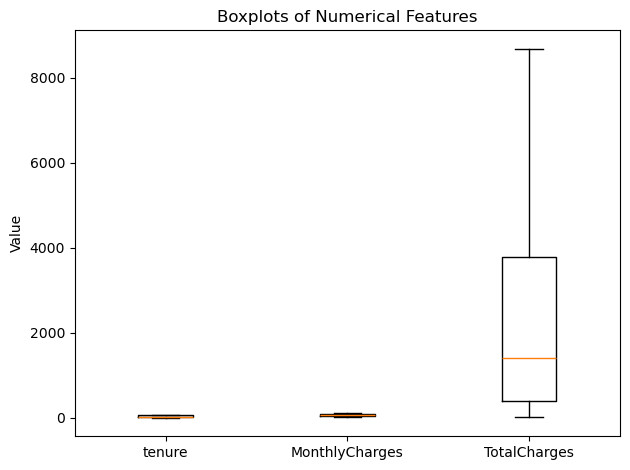

In [35]:

# Select a few numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data = [df[col].dropna() for col in num_cols]  # drop NaNs to avoid errors

# Fix: Match positions to the number of columns
plt.boxplot(data, positions=range(len(num_cols)))
plt.xticks(ticks=range(len(num_cols)), labels=num_cols)
plt.title('Boxplots of Numerical Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

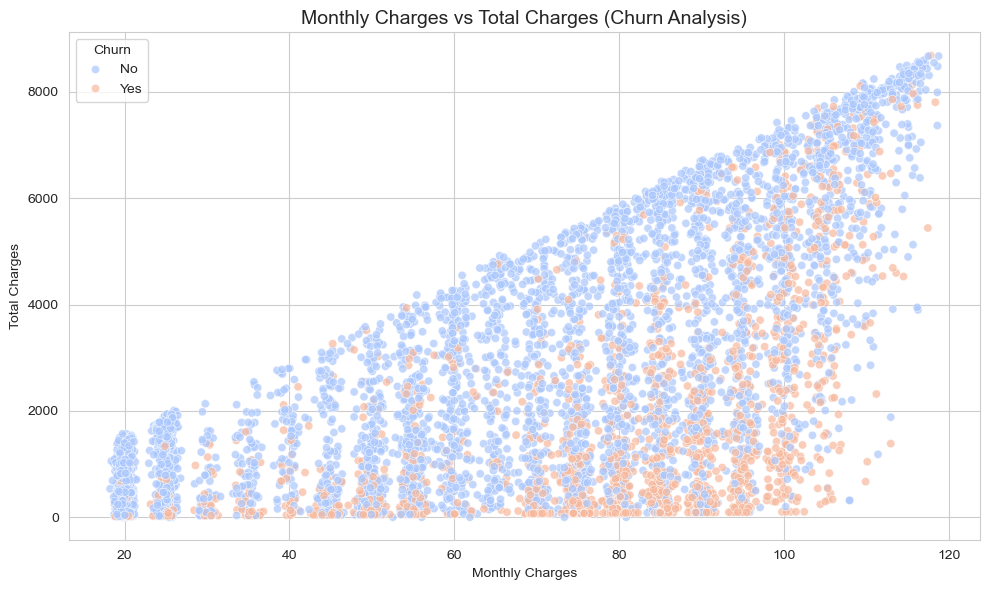

In [13]:

# Clean TotalCharges column (it sometimes contains blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot of MonthlyCharges vs TotalCharges with hue based on Churn
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='coolwarm', alpha=0.7)

# Set titles and labels
plt.title('Monthly Charges vs Total Charges (Churn Analysis)', fontsize=14)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')

# Show the plot
plt.tight_layout()
plt.show()


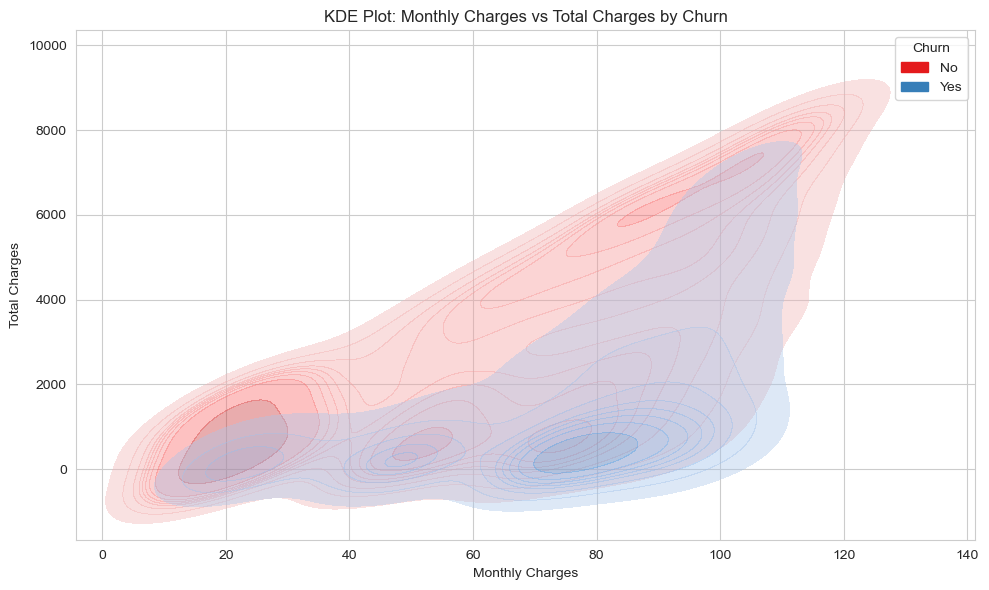

In [15]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', fill=True, alpha=0.4, palette='Set1')
plt.title('KDE Plot: Monthly Charges vs Total Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()
